<a href="https://colab.research.google.com/github/BaharehAm/Python-tutorials-for-Advanced-Data-Mining/blob/main/Tutorial_4_Decision_Tree%2C_SVM_SVR%2C_Regression_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classifier

[Scikit-learn documentation for decision trees](https://scikit-learn.org/stable/modules/tree.html)

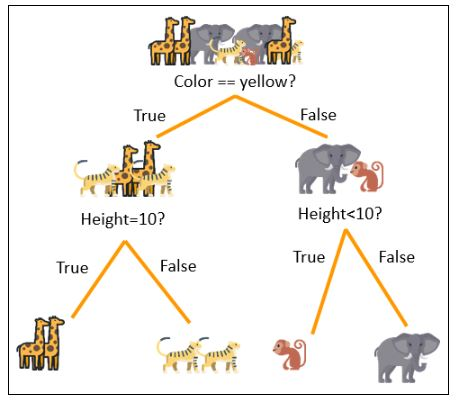
[Ref](https://www.simplilearn.com/tutorials/machine-learning-tutorial/decision-tree-in-python)

**Attribute Selection Measures (splitting rules):**

1.  The **Gini Index** is used to determine the correct variable for splitting nodes. It measures how often a randomly chosen variable would be incorrectly identified. It means an attribute with **lower gini index** should be preferred.
2.  **Entropy** is the measure of uncertainty or randomness in a data set. The **information gain** measures the decrease in entropy after the data set is split. The feature that returns the highest gain will be used for the first split.


In [ ]:
%%capture
pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from google.colab import files


In [ ]:
data_to_load = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
data = pd.read_csv('diabetes.csv')
data.head(4)

,Pregnancies,Glucose,Pressure,Insulin,BMI,DPF,Age,Social smoker,Social drinker,Outcome
0,0,86,68,0,35.8,0.238,25,1,0,0
1,0,161,50,0,21.9,0.254,65,0,1,0
2,0,121,66,165,34.3,0.203,33,0,0,1
3,0,117,80,53,45.2,0.089,24,1,1,0


In [ ]:
## Replace the zeros with "NaN"
import numpy as np
data[["BMI"]]=data[["BMI"]].replace(0,np.NaN)
data[["Insulin"]]=data[["Insulin"]].replace(0,np.NaN)

## Replace the "NaN" values with the mean
data['BMI'].fillna(data['BMI'].mean(), inplace=True)
data['Insulin'].fillna(data['Insulin'].mean(), inplace=True)

In [ ]:
# Specify X (Features) and y (Outcome or target) using NumPy arrays
X = data.values[:, 0:9]
y = data.values[:,-1]
np.shape(X)
np.shape(y)
y

In [ ]:
# Specify X (Features) and y (Outcome or target) using DataFrames
X = data.iloc[:, 0:9]
y = data.iloc[:, 9:10]
X
y

,Pregnancies,Glucose,Pressure,Insulin,BMI,DPF,Age,Social smoker,Social drinker
0,0,86,68,155.362007,35.8,0.238,25,1,0
1,0,161,50,155.362007,21.9,0.254,65,0,1
2,0,121,66,165.000000,34.3,0.203,33,0,0
3,0,117,80,53.000000,45.2,0.089,24,1,1
4,0,162,76,100.000000,53.2,0.759,25,1,1
...,...,...,...,...,...,...,...,...,...
495,13,152,90,29.000000,26.8,0.731,43,1,0
496,13,104,72,155.362007,31.2,0.465,38,1,0
497,14,100,78,184.000000,36.6,0.412,46,0,1
498,14,175,62,155.362007,33.6,0.212,38,0,0


In [ ]:
### Data splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print('X_train size: %.F, X_test size: %.F' %(len(X_train), len(X_test)))

## check out the class ratios (stratify parameter)

# works only for DataFrames
print('ratio of class 1 to class 0 in training set: %.2F' %(len(y_train[y_train['Outcome']==1])/len(y_train[y_train['Outcome']==0])))
print('ratio of class 1 to class 0 in testing set: %.2F' %(len(y_test[y_test['Outcome']==1])/len(y_test[y_test['Outcome']==0])))

# works for both DataFrames and NumPy arrays
print('ratio of class 1 to class 0 in training set: %.2F' %(np.sum(y_train)/(len(y_train)-np.sum(y_train))))
print('ratio of class 1 to class 0 in testing set: %.2F'  %(np.sum(y_test)/(len(y_test)-np.sum(y_test))))

X_train size: 400, X_test size: 100
ratio of class 1 to class 0 in training set: 0.50
ratio of class 1 to class 0 in testing set: 0.49
ratio of class 1 to class 0 in training set: 0.50
ratio of class 1 to class 0 in testing set: 0.49


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)

In [ ]:
## Make prediction on training set
y_pred_train = clf.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[267   0]
 [  0 133]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       133

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
## Make prediction on test set
y_pred_test = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[55 12]
 [20 13]]
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        67
           1       0.52      0.39      0.45        33

    accuracy                           0.68       100
   macro avg       0.63      0.61      0.61       100
weighted avg       0.66      0.68      0.67       100



In [ ]:
list(X.columns)
np.array(['0', '1'])

array(['0', '1'], dtype='<U1')

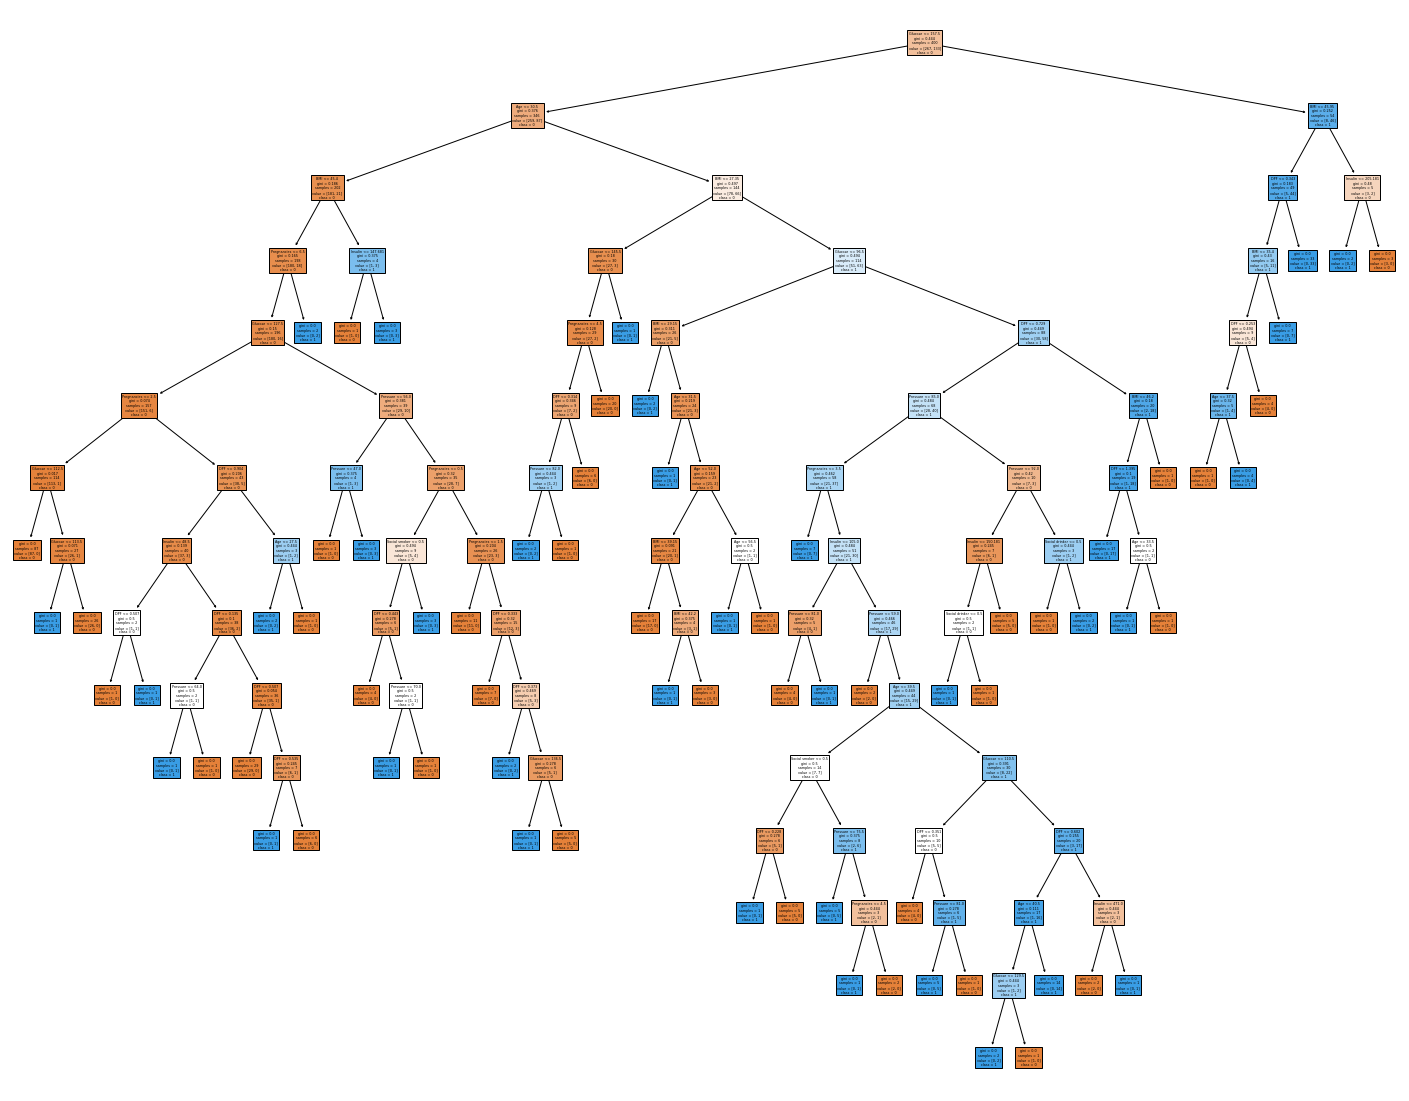

In [ ]:
## visualizing the tree
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=list(X.columns),
                   class_names=np.array(['0', '1']),
                   filled=True)

### Cross Validation

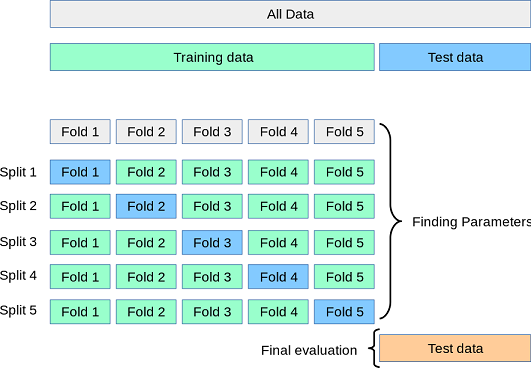
[Ref](https://scikit-learn.org/stable/modules/cross_validation.html)

* **criterion** : Decides the measure of the quality of a split based on criteria like “gini” and “entropy”.
* **max_depth** : The maximum depth of the tree, the more depth of tree generally it overfits the data.
* **max_leaf_nodes** : Grows the tree with a specified number of leaf nodes.
* **min_samples_split** : The minimum number of samples that are required to split an internal node.
* **min_samples_leaf** : The minimum number of samples that are required to be at a leaf node of the tree.

In [ ]:
list(range(3,10))

[3, 4, 5, 6, 7, 8, 9]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv_method = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)


parameters = {'criterion' : ['gini', 'entropy'],
              'max_leaf_nodes' : [2, 10, 100],
              'min_samples_split' : [2, 10, 100],
              'max_depth': list(range(3,10)),
              'min_samples_leaf' : [1, 2]
              }
clf = DecisionTreeClassifier(random_state=42)
clf_GridSearchCV = GridSearchCV(estimator=clf,
                     param_grid=parameters,
                     cv=cv_method,
                     verbose=1,
                     scoring='accuracy')

clf_GridSearchCV.fit(X_train, y_train)


clf_GridSearchCV.cv_results_
print(clf_GridSearchCV.best_params_)
print(clf_GridSearchCV.best_score_)


Fitting 5 folds for each of 252 candidates, totalling 1260 fits
{'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 100, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.805


In [ ]:
# clf = DecisionTreeClassifier(criterion = 'gini',
#                             max_leaf_nodes = 100,
#                             min_samples_split = 10,
#                             max_depth = 6,
#                             min_samples_leaf = 2,
#                             random_state=42)

clf.set_params(**clf_GridSearchCV.best_params_, random_state=42)

clf = clf.fit(X_train, y_train)

## Make prediction on training set
y_pred_train = clf.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

## Make prediction on test set
y_pred_test = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[243  24]
 [ 28 105]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       267
           1       0.81      0.79      0.80       133

    accuracy                           0.87       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.87      0.87      0.87       400

[[54 13]
 [15 18]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        67
           1       0.58      0.55      0.56        33

    accuracy                           0.72       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.72      0.72      0.72       100



In [ ]:
print(y_pred_test)

[0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0]


In [ ]:
preds = pd.DataFrame([np.ravel(y_test), y_pred_test]).T
preds.columns = ['actuals', 'predictions']
preds

,actuals,predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
95,0,0
96,1,0
97,1,0
98,0,0


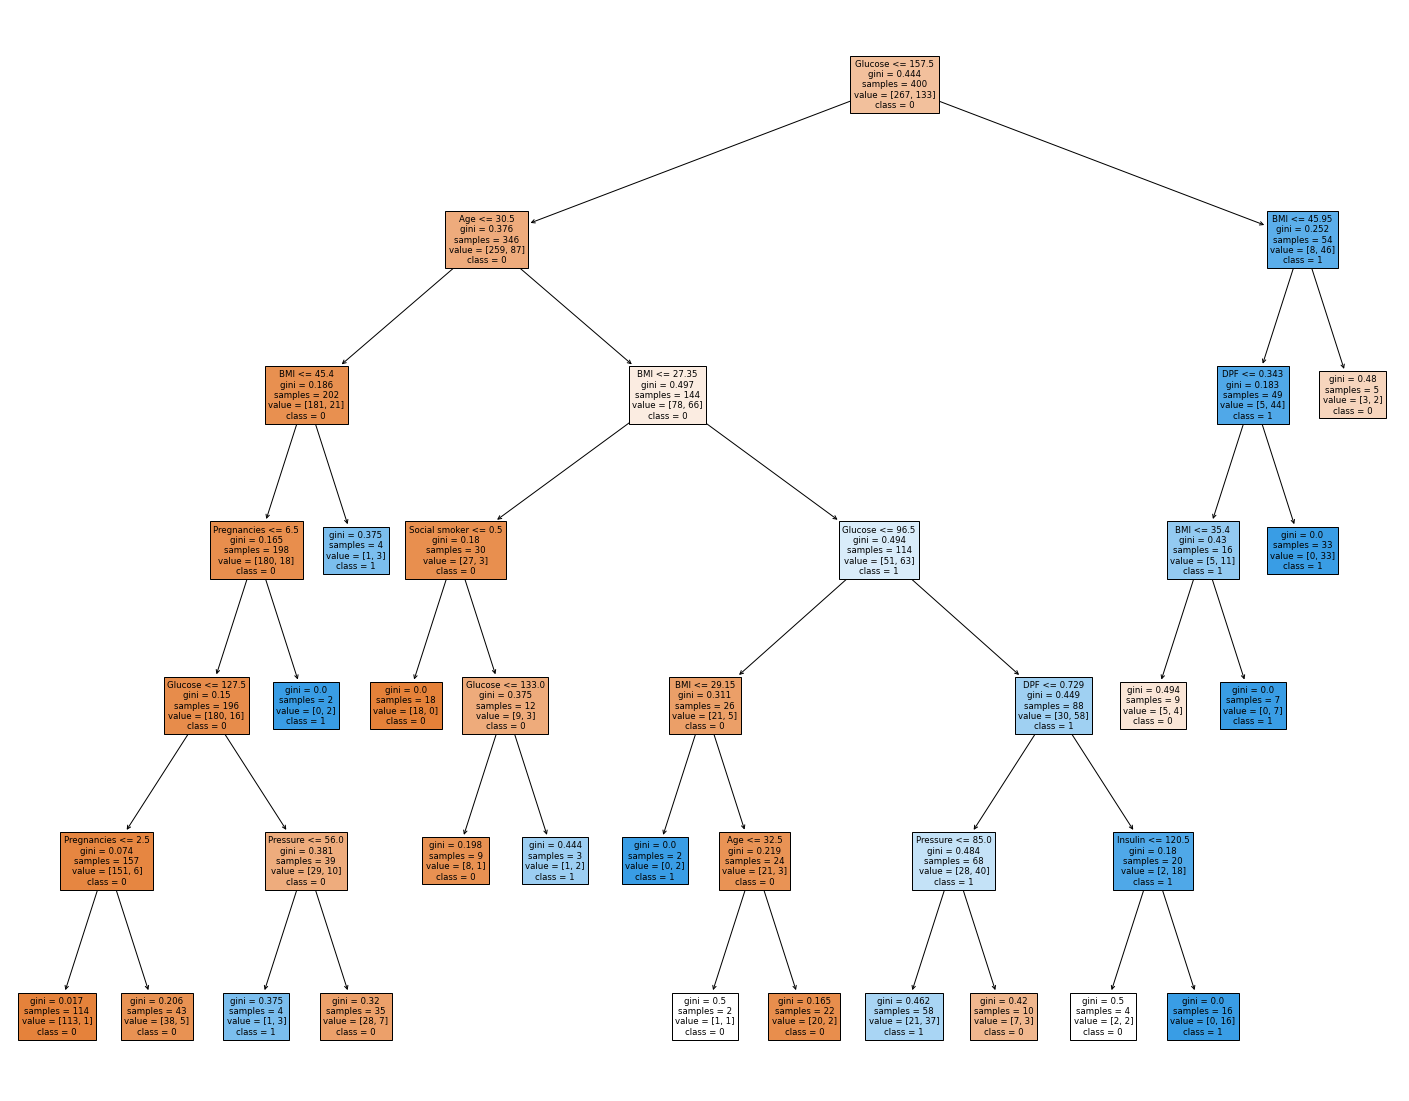

In [ ]:
## visualizing the tree
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=list(X.columns),
                   class_names=np.array(['0', '1']),
                   filled=True)

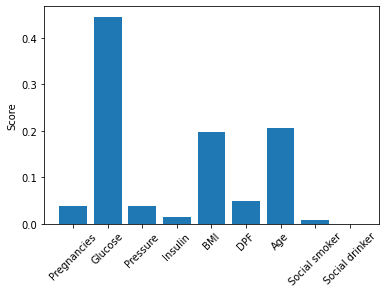

In [ ]:
# get importance
importance = clf.feature_importances_
importance

# create a datfarame
importance_df = pd.DataFrame()
importance_df['Feature'] = X.columns
importance_df['importance'] = importance
importance_df

# plot feature importance
ax = plt.gca()
ax.bar(importance_df['Feature'] , importance_df['importance'])
ax.set_xticklabels(labels=X.columns, rotation=45, fontsize=10)
ax.set_ylabel('Score')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

# Support Vector Machine (SVM)

**SVM** constructs a **hyperplane** in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize the missclassification error.
**Support vectors** are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. A **margin** is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.



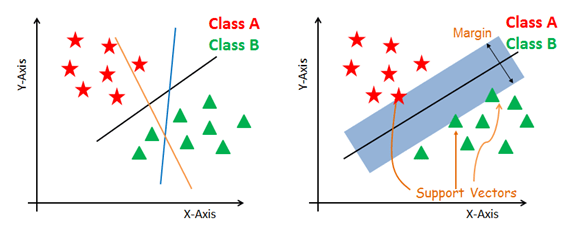

**Slack variables** are introduced to allow certain constraints to be violated. That is, certain training points will be allowed to be within the margin. We want the **number of points** within the margin to be as small as possible, and of course we want their **penetration** of the margin to be as small as possible.  **C** (error penalty or cost of misclassification) is a hyperparameter that decides the trade-off between maximizing the margin and minimizing the misclassification or error.When C is large, the slack variables can be large, i.e. you allow a larger number of data points to be misclassified or to violate the margin; when C is small, you force the individual slack variables to be small, i.e. you do not allow many data points to fall on the wrong side of the margin or the hyperplane. So, the margin is narrow and there are few misclassifications.

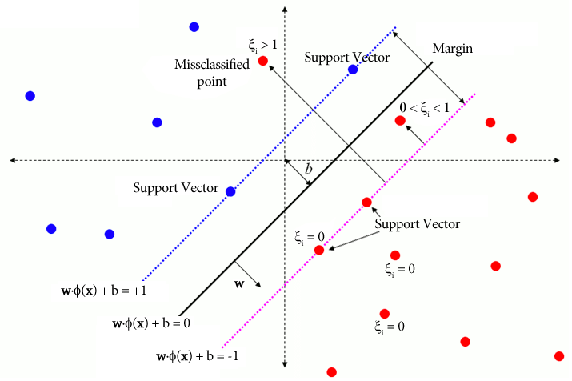

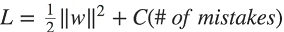

The SVM algorithm is implemented in practice using a **kernel** which is a function that takes low dimensional input space and transforms it to a higher dimensional space i.e. it converts not separable problem to separable problem. It is mostly useful in non-linear separation problem.

*   **Linear** Kernel can be used as normal dot product of any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.
*   **Polynomial** Kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.
*   **Radial Basis Function Kernel(RBF)** can map an input space in infinite dimensional space. ([Ref](https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python))

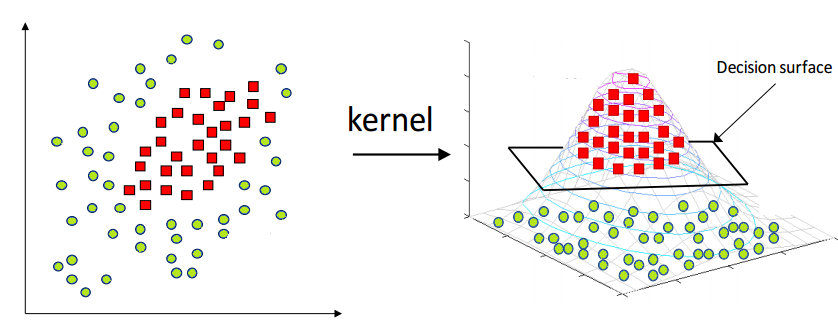
[Ref](https://medium.com/@apurvjain37/support-vector-machine-s-v-m-classifiers-and-kernels-9e13176c9396)


 The **Gamma** Hyperparameter comes in handy in case of a RBF or Poly kernel. It doesn't have any role when your kernel is linear. Gamma decides that how much curvature we want in a decision boundary. Low values of Gamma indicate a large similarity radius which results in more points being grouped together (more curvature). For High values of Gamma, the points need to be very close to each other in order for it to be considered in the same group (less curvature). See [here](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html).

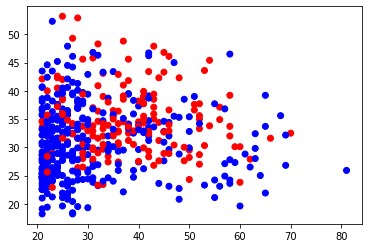

In [ ]:
colors = {1: 'red', 0:'blue'}
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(data['Age'], data['BMI'], c = data['Outcome'].map(colors))
plt.show()

In [ ]:
from sklearn import svm

In [ ]:
clf=svm.SVC(random_state=42)
clf.fit(X_train, np.ravel(y_train))


y_pred_train = clf.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))



y_pred_test = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[243  24]
 [ 69  64]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       267
           1       0.73      0.48      0.58       133

    accuracy                           0.77       400
   macro avg       0.75      0.70      0.71       400
weighted avg       0.76      0.77      0.75       400

[[60  7]
 [21 12]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        67
           1       0.63      0.36      0.46        33

    accuracy                           0.72       100
   macro avg       0.69      0.63      0.64       100
weighted avg       0.70      0.72      0.70       100



In [ ]:
params = clf.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.T

,0
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1


In **Random Search**, we create a grid of hyperparameters and train/test our model on just some random combination of these hyperparameters.  You can check out the complete list in the sklearn documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC). The most critical hyperparameters for SVM are `kernel`, `C`, and `gamma`.

In [ ]:
list(np.logspace(-2, 10, 13))

[0.01,
 0.1,
 1.0,
 10.0,
 100.0,
 1000.0,
 10000.0,
 100000.0,
 1000000.0,
 10000000.0,
 100000000.0,
 1000000000.0,
 10000000000.0]

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


cv_method = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)

# defining parameter range
random_search = {'C': list(np.logspace(-2, 10, 13)),
                'gamma': list(np.logspace(-9, 3, 13)),
                'kernel': ['rbf']
                }

clf=svm.SVC(random_state=42)

clf_RandomizedSearchCV = RandomizedSearchCV(estimator=clf,
                                            cv=cv_method,
                                            param_distributions = random_search,
                                            verbose=1,
                                            scoring='accuracy'
                                            )

# fitting the model for randomized search
clf_RandomizedSearchCV.fit(X_train, np.ravel(y_train))

clf_RandomizedSearchCV.cv_results_
print(clf_RandomizedSearchCV.best_params_)
print(clf_RandomizedSearchCV.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'kernel': 'rbf', 'gamma': 1e-07, 'C': 10000.0}
0.7575000000000001


In [ ]:
clf.set_params(**clf_RandomizedSearchCV.best_params_, random_state=42)

clf = clf.fit(X_train, np.ravel(y_train))

y_pred_test = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[58  9]
 [17 16]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        67
           1       0.64      0.48      0.55        33

    accuracy                           0.74       100
   macro avg       0.71      0.68      0.68       100
weighted avg       0.73      0.74      0.73       100



# SVR & Regression Trees

In [ ]:
%%capture
pip install yfinance

In [ ]:
import yfinance as yf
data = yf.download("AAPL", start="2022-01-01", end="2022-02-10")
len(data)
data
data.reset_index(inplace=True)
data

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,180.683868,104487900
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,178.390717,99310400
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.645538,94537600
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.746796,96904000
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.915573,86709100
5,2022-01-10,169.080002,172.500000,168.169998,172.190002,170.935425,106765600
6,2022-01-11,172.320007,175.179993,170.820007,175.080002,173.804367,76138300
7,2022-01-12,176.119995,177.179993,174.820007,175.529999,174.251083,74805200
8,2022-01-13,175.779999,176.619995,171.789993,172.190002,170.935425,84505800
9,2022-01-14,171.339996,173.779999,171.089996,173.070007,171.809036,80440800


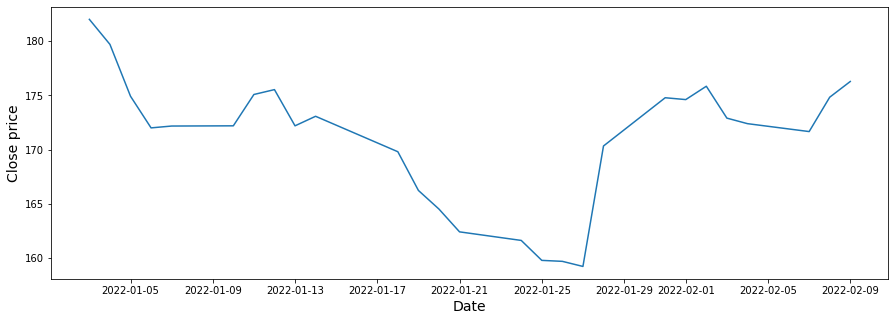

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close price', fontsize=14)
plt.show()

In [ ]:
## Data scaling
from sklearn.preprocessing import MinMaxScaler
data_close = data[['Close']]
data_close
sc = MinMaxScaler(feature_range = (0, 1))
data_close_cs = sc.fit_transform(data_close)
data_close_cs

array([[1.        ],
       [0.89863983],
       [0.68889871],
       [0.56077238],
       [0.56823171],
       [0.56910948],
       [0.69591949],
       [0.71566487],
       [0.56910948],
       [0.60772313],
       [0.46423892],
       [0.3075909 ],
       [0.23211912],
       [0.13997382],
       [0.10530911],
       [0.02457208],
       [0.02062314],
       [0.        ],
       [0.48749469],
       [0.68275569],
       [0.67529635],
       [0.72926722],
       [0.60026313],
       [0.57788513],
       [0.54585371],
       [0.68494977],
       [0.74857405]])

In [ ]:
train_size=int(len(data_close_cs)*0.80)
test_size=len(data_close_cs)-train_size
print("train_size: %.F, test_size: %.F" %(train_size, test_size))

train_size: 21, test_size: 6


In [ ]:
## prepare the training set for training the model
train_set = data_close_cs[:train_size]
test_set = data_close_cs[train_size:]
X_train = []
y_train = []
for i in range(3, train_size):
  X_train.append(train_set[i-3:i])                         ## X1:(C0,C1,C2) ==> y1:C3
  y_train.append(train_set[i])
X_train, y_train = np.array(X_train), np.array(y_train)
y_train
X_train

## prepare the test set for making predictions
temp = data_close_cs[train_size-3:]
temp
X_test = []

for i in range(3, len(temp)):
  X_test.append(temp[i-3:i])
X_test = np.array(X_test)
X_test

y_test = np.array(test_set)
y_test

array([[0.72926722],
       [0.60026313],
       [0.57788513],
       [0.54585371],
       [0.68494977],
       [0.74857405]])

In [ ]:
def prepare_data(data, train_size, test_size, h):
  train_set = data[:train_size]
  test_set = data[train_size:]
  X_train = []
  y_train = []
  for i in range(h, train_size):
    X_train.append(train_set[i-h:i])                         ## X1:(C0,C1,C2) ==> y1:C3
    y_train.append(train_set[i])
  X_train, y_train = np.array(X_train), np.array(y_train)

  ## prepare the test set for making predictions
  temp = data[train_size-h:]
  X_test = []
  for i in range(h, len(temp)):
    X_test.append(temp[i-h:i])
  X_test = np.array(X_test)
  y_test = np.array(test_set)
  return X_train, y_train, X_test, y_test


X_train = prepare_data(data_close_cs, train_size, test_size,  3)[0]
y_train = prepare_data(data_close_cs, train_size, test_size,  3)[1]
X_test = prepare_data(data_close_cs, train_size, test_size,  3)[2]
y_test = prepare_data(data_close_cs, train_size, test_size,  3)[3]

In [ ]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (18, 3, 1)
y_train:  (18, 1)
X_test:  (6, 3, 1)
y_test (6, 1)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

In [ ]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (18, 3)
y_train:  (18,)
X_test:  (6, 3)
y_test (6,)


In [ ]:
## Fitting a SVR model with no hyper-parameter tuning
from sklearn.svm import SVR
model = SVR(kernel= 'rbf', C= 1e2, gamma= 0.1)
model.fit(X_train, np.ravel(y_train))

# ## Fitting a regression tree model with no hyper-parameter tuning
# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor()
# model.fit(X_train, np.ravel(y_train))

SVR(C=100.0, gamma=0.1)

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (18,)
Test data prediction: (6,)


In [ ]:
test_predict

array([0.63815642, 0.67336606, 0.54223585, 0.50864103, 0.48714095,
       0.63416549])

In [ ]:
train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("predicted Train data:", train_predict.shape)
print("predicted Test data:", test_predict.shape)
print("Actual Train data:", y_train.shape)
print("Actual Test data:", y_test.shape)

predicted Train data: (18, 1)
predicted Test data: (6, 1)
Actual Train data: (18, 1)
Actual Test data: (6, 1)


In [ ]:
# Transform back to original form
train_predict = sc.inverse_transform(train_predict)
test_predict = sc.inverse_transform(test_predict)
original_ytrain = sc.inverse_transform(y_train)
original_ytest = sc.inverse_transform(y_test)

In [ ]:
test_predict

array([[173.76358168],
       [174.5660093 ],
       [171.57755265],
       [170.81192684],
       [170.3219402 ],
       [173.67262851]])

In [ ]:
# Evaluation metrics: MSE , RMSE and MAE

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  2.769766792948926
Train data MSE:  7.671608087322578
Train data MAE:  2.1872257224792673
-------------------------------------------------------------------------------------
Test data RMSE:  2.4354126470780995
Test data MSE:  5.931234761547954
Test data MAE:  2.0863975885541493


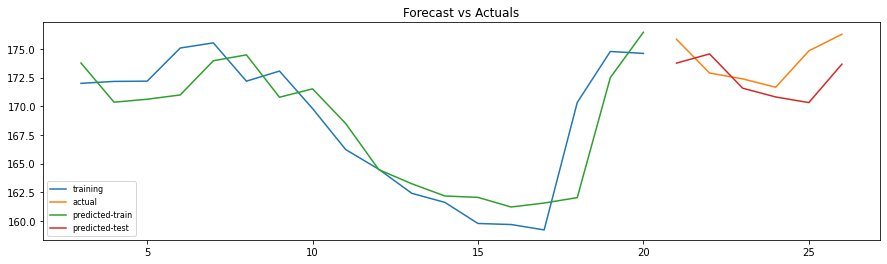

In [ ]:
# Make as pandas series
y_train_df = data[['Close']][3:train_size]
y_test_df = data[['Close']][train_size:]

y_pred_train = pd.Series(np.ravel(train_predict), index=y_train_df.index)
y_pred_test = pd.Series(np.ravel(test_predict), index=y_test_df.index)

# Plot
plt.figure(figsize=(15,4))
plt.plot(y_train_df, label='training')
plt.plot(y_test_df, label='actual')
plt.plot(y_pred_train, label='predicted-train')
plt.plot(y_pred_test, label='predicted-test')
plt.title('Forecast vs Actuals')
plt.legend(loc='lower left', fontsize=8)
plt.show()